In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [65]:
#Amazon Product Review Sentiment Analysis using RNN

In [3]:
pip install tensorflow

                                              0.0/272.8 MB ? eta -:--:--
                                              0.3/272.8 MB 7.0 MB/s eta 0:00:40
                                             1.1/272.8 MB 10.0 MB/s eta 0:00:28
                                             1.6/272.8 MB 10.4 MB/s eta 0:00:27
                                             2.2/272.8 MB 10.6 MB/s eta 0:00:26
                                             2.7/272.8 MB 10.9 MB/s eta 0:00:25
                                             3.3/272.8 MB 11.0 MB/s eta 0:00:25
                                             3.8/272.8 MB 11.0 MB/s eta 0:00:25
                                             4.4/272.8 MB 11.1 MB/s eta 0:00:25
                                             4.9/272.8 MB 11.2 MB/s eta 0:00:24
                                             5.5/272.8 MB 11.3 MB/s eta 0:00:24
                                             6.0/272.8 MB 11.3 MB/s eta 0:00:24
                                             6.

In [12]:
import pandas as pd                     # to extract data from dataset(.csv file)

In [13]:
import csv                              #used to read and write to csv files
import numpy as np                      #used to convert input into numpy arrays to be fed to the model
import matplotlib.pyplot as plt         #to plot/visualize sales data and sales forecasting
import tensorflow as tf                 # acts as the framework upon which this model is built
from tensorflow import keras            #defines layers and functions in the model
 
#here the csv file has been copied into three lists to allow better availability
name,email,product,date = get_data('C:\July-2023-PGP BIg Data & Machine Learning-Great Learning\Project Practice\Order_details(masked).csv')

NameError: name 'get_data' is not defined

In [26]:
#Amazon Product Review Sentiment Analysis using RNN

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Embedding,  BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
 
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('AmazonReview.csv')
 
# Printing shape of the dataset
print(data.shape)
# printing columns and rows information
print(data.info())

(25000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [29]:
# looking for NULL values
print("Null Values:\n", data.isna().sum())
 
# dropping null values
data = data.dropna()
 
# again checking for NULL values
print("Null Values after dropping:\n", data.isna().sum())

Null Values:
 Review       1
Sentiment    0
dtype: int64
Null Values after dropping:
 Review       0
Sentiment    0
dtype: int64


In [30]:
#count of unique values in Sentiment column
data['Sentiment'].value_counts()

1    5000
2    5000
3    5000
4    5000
5    4999
Name: Sentiment, dtype: int64

In [31]:
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [32]:
data.tail()

,Review,Sentiment
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5
24999,Awsome!!! I loved this little speaker. It has ...,5


In [33]:
data.count()

Review       24999
Sentiment    24999
dtype: int64

In [34]:
#Text Cleaning: In this step, we will clean the ‘reviews.text’ column.
#We will remove the unwanted HTML tags, brackets, or special characters that may be present in the texts.
#We will use Regex to clean the text.

In [35]:
pip install nltk

In [36]:
# Import the nltk module first before any
import nltk

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# Then proceed to download nltk libraries if necessary
nltk.download()

sentence = """Showing you how to fix python errors like a pro."""

tokens = nltk.word_tokenize(sentence)

#print it to see
print(tokens)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Showing', 'you', 'how', 'to', 'fix', 'python', 'errors', 'like', 'a', 'pro', '.']


In [39]:
# Then proceed to download nltk libraries if necessary
nltk.download()

sentence1 = """Surrendering all my anger fear worries doubts disturbances imbalances to Master's treasury and I have no concern about them."""


tokens1 = nltk.word_tokenize(sentence1)
#print it to see

print(tokens1)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Surrendering', 'all', 'my', 'anger', 'fear', 'worries', 'doubts', 'disturbances', 'imbalances', 'to', 'Master', "'s", 'treasury', 'and', 'I', 'have', 'no', 'concern', 'about', 'them', '.']


In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords

In [42]:
stop_words = set(stopwords.words('english'))

In [43]:
# downloading stopwords from nltk library
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))
 
# Review text Cleaning
def clean_reviews(text):
     
    # removing html brackets and other square brackets from the string using regex
    regex = re.compile('<.*?>') # r'<.*?>'
    text = re.sub(regex, '', text)
 
    # removing special characters like @, #, $, etc
    pattern = re.compile('[^a-zA-z0-9\s]')
    text = re.sub(pattern,'',text)
 
    # removing numbers
    pattern = re.compile('\d+')
    text = re.sub(pattern,'',text)
    # converting text to lower case
    text = text.lower()
     
    # Tokenization of words
    text = word_tokenize(text)
     
    # Stop words removal
    text = [word for word in text if not word in stop_words]
     
    return text
 
# using the clean_reviews function on the dataset
data['Review'] = data['Review'].apply(clean_reviews)
    

In [44]:
# print the english stopwords
english_stopwords = set(stopwords.words('english'))
print(english_stopwords)

{'too', 'before', 'while', 'more', 'hasn', 'ain', 'but', 'her', 'don', "hadn't", 'when', "it's", 'weren', 've', 'hers', 'aren', 'only', 'no', 'down', 'yourselves', "you're", 'they', 'during', 'd', 'who', 'm', 'nor', "wouldn't", 'above', 'wouldn', "she's", 'very', 'then', "you've", 'yours', 'all', "wasn't", 'these', 'he', 'the', 'itself', 'didn', "haven't", 'won', 'myself', 'any', 'by', 'me', 'doesn', 'is', 'those', 'it', 'or', 'not', 'than', 'its', 'having', 'off', 'there', 'up', 'shouldn', "needn't", 'needn', 'as', 'some', 'i', "shouldn't", 'where', 't', "doesn't", 'you', 'isn', 'y', 'mustn', 'until', 'whom', 'for', 'each', 'about', "mightn't", 'haven', 'my', 'against', 'yourself', 'am', 'over', 'doing', 'hadn', 'did', 'should', "you'll", 'we', 'now', "you'd", 'our', 'below', 'after', 'so', "that'll", 'why', 'mightn', "aren't", 'them', 'ma', 'into', 'if', 'few', 'again', 'ours', 'theirs', 'how', 'your', 'his', 'what', 'was', 'on', 'themselves', 'o', 'being', 'that', 'both', 'this', 'b

In [45]:
#Tokenization & Text Encoding: In this step, we will use tokenization to first generate the tokens. 
#For this, we will use Tokenizer from the Tensorflow library. And we will encode the text using the same.

#We have around 5 unique values in the ‘reviews.rating’ column. 
#So let’s use one-hot encoding to represent each value in the rating as separate columns

In [46]:
tokenizer = Tokenizer()
 
# converting all the reviews to list to pass it as a parameter to fit_on_texts
reviews_to_list = data['Review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)
 
# Generating text sequences
text_sequences = np.array(tokenizer.texts_to_sequences(reviews_to_list))
 
# one hot encoding
data = pd.get_dummies(data, columns = ['Sentiment'])
 
# setting maximum words we want in an example
max_words = 500
 
# Generatin our X (input) to the model
# using pad_sequences and y (output)
X = pad_sequences(text_sequences, maxlen = max_words)
y = data[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4',
       'Sentiment_5']]
print(X.shape, y.shape)

(24999, 500) (24999, 5)


In [47]:
#Train-Test Split: In this step, we will split our dataset into training and testing datasets.
#We will split the dataset into 80-20%, i.e. 80% for the training and 20% for testing.

In [48]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19999, 500) (5000, 500) (19999, 5) (5000, 5)


In [49]:
#Model Building, Compiling andLet’s Training

# 1. Build the Model: In this step, let’s build our model using RNN.

In [50]:
# Creating a RNN model
rnn = Sequential(name="Simple_RNN")
rnn.add(Embedding(len(tokenizer.word_index)+1,
                        max_words,
                        input_length=max_words))
 
rnn.add(SimpleRNN(128,activation='relu',return_sequences=True))
 
rnn.add(SimpleRNN(64,activation='relu',return_sequences=False))
 
rnn.add(Dense(5, activation='softmax'))
  
# printing model summary
print(rnn.summary())

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 500)          19819500  
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 128)          80512     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 19,912,689
Trainable params: 19,912,689
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
#Compiling the model and Model Evaluation: Let’s compile and train the model we defined in the above step.
#Then we will see the accuracy of the model on the test dataset.

In [52]:
# Compiling model
rnn.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)
 
# Training the model
history = rnn.fit(X_train, y_train,
                        batch_size=64,
                        epochs=2,
                        verbose=1,
                          validation_data = (X_test, y_test))
 
# Printing model score on test data
print("Simple_RNN Score---> ", rnn.evaluate(X_test, y_test, verbose=1))

Epoch 1/2
313/313 [==============================] - 465s 1s/step - loss: 1.5934 - accuracy: 0.3299 - val_loss: 1.2844 - val_accuracy: 0.4266
Epoch 2/2
157/157 [==============================] - 27s 170ms/step - loss: 1.2918 - accuracy: 0.4270
Simple_RNN Score--->  [1.2918392419815063, 0.4269999861717224]


In [53]:
#Thus we’ve got an accuracy of 42% while using RNN.

In [55]:
#LSTM ( Long Short Term Memory)
#et’s use LSTM and see how the model performance is changing. We will simply start with defining the model, 
#compiling and then training. To understand the theoretical aspects of LSTM please visit this article Long Short Term Memory Networks Explanation. 

In [56]:
model = Sequential(name="LSTM_Model")
model.add(Embedding(len(tokenizer.word_index)+1,
                    max_words,
                    input_length=max_words))
 
# adding a LSTM layer
model.add(LSTM(150, return_sequences=False))
BatchNormalization()
model.add(Dropout(0.5))
 
#adding a dense layer with activation function of relu
model.add(Dense(50, activation='relu'))
BatchNormalization()
model.add(Dropout(0.5))
 
# adding the final output activation with activation function of softmax
model.add(Dense(5, activation='softmax'))
 
# printing model summary
print(model.summary())

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 500)          19819500  
                                                                 
 lstm (LSTM)                 (None, 150)               390600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                7550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 20,217,905
Trainable params: 20,217,905
No

In [57]:
# Compiling the model
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)
 
# Training the GRU model
history = model.fit(X_train, y_train,
                         batch_size=64,
                         epochs=3,
                         verbose=1,
                       validation_data=(X_test, y_test))
 
# Printing model score on test data
print("LSTM model Score---> ", model.evaluate(X_test, y_test, verbose=1))

Epoch 1/3
313/313 [==============================] - 1285s 4s/step - loss: 1.4055 - accuracy: 0.3741 - val_loss: 1.2548 - val_accuracy: 0.4524
Epoch 2/3
313/313 [==============================] - 1197s 4s/step - loss: 1.1187 - accuracy: 0.5285 - val_loss: 1.2333 - val_accuracy: 0.4528
Epoch 3/3
157/157 [==============================] - 120s 763ms/step - loss: 1.3425 - accuracy: 0.4380
LSTM model Score--->  [1.3424614667892456, 0.43799999356269836]


In [59]:
#Thus we got the final accuracy of 43% using LSTM. Let’s take a look at the classification report of this LSTM model.

157/157 [==============================] - 137s 868ms/step


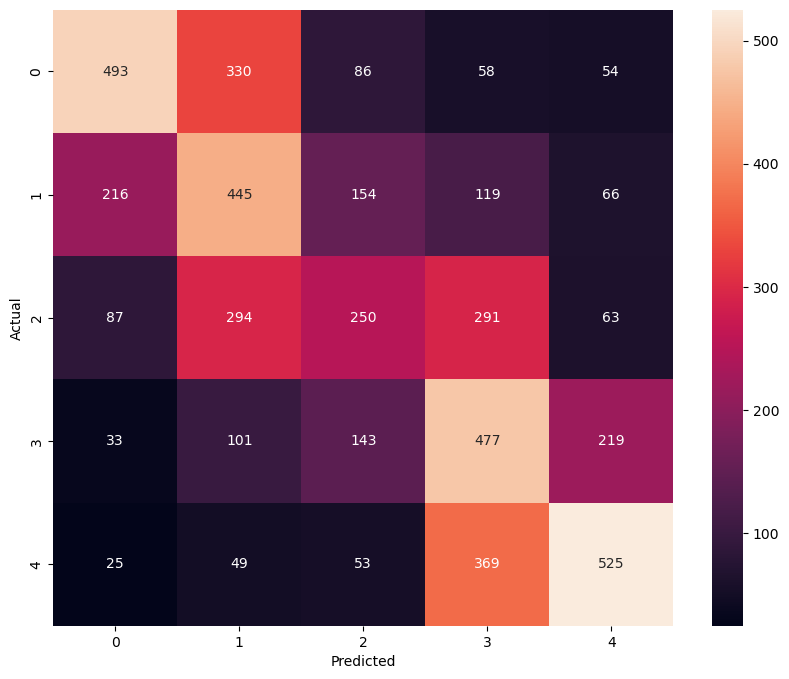

In [60]:
# converting y_test tht was one hot encoded to one column fo rconfusion matrix
y_true = np.argmax(y_test.values, axis=1)
y_true.shape
 
# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = tf.math.confusion_matrix(y_true, y_pred)
   
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.48      0.53      1021
           1       0.37      0.45      0.40      1000
           2       0.36      0.25      0.30       985
           3       0.36      0.49      0.42       973
           4       0.57      0.51      0.54      1021

    accuracy                           0.44      5000
   macro avg       0.45      0.44      0.44      5000
weighted avg       0.45      0.44      0.44      5000



In [62]:
#Testing the trained model
#Let’s take a look at how the model is performing on the text we give in.
#For this make a custom function in which we will pass out text and it will generate the rating using the model.

In [80]:
def predict_review_rating(text):
    text_sequences_test = np.array(tokenizer.texts_to_sequences(text))
    testing = pad_sequences(text_sequences_test, maxlen = max_words)
    y_pred_test = np.argmax(model.predict(testing), axis=1)
    return y_pred_test[0]+1
 
# Testing
rating1 = predict_review_rating('Bad product')
print("The rating according to the review is: ", rating1)
 
rating2 = predict_review_rating('Awesome product,  I will recommend this to other users.')
print("The rating according to the review is: ", rating2)

1/1 [==============================] - 0s 272ms/step
The rating according to the review is:  4
2/2 [==============================] - 1s 348ms/step
The rating according to the review is:  5


In [66]:
import re
  
print(re.search(r"^x","xenon"))
print(re.search(r"s$","geeks"))

<re.Match object; span=(0, 1), match='x'>
<re.Match object; span=(4, 5), match='s'>


In [67]:
print(re.search(r"9+","289908"))
print(re.search(r"\d{3}","hello1234"))

<re.Match object; span=(2, 4), match='99'>
<re.Match object; span=(5, 8), match='123'>
